# QUESTION 1
Simple Linear Regression is a statistical method that shows the relationship between two variables:

Independent variable (X): the predictor

Dependent variable (Y): the outcome

It fits a straight line to the data using the equation:

𝑌
=
𝛽
0
+
𝛽
1
𝑋
+
𝜀
Y=β0+β1X+ε

Where:

β0 = intercept

β1 = slope (effect of X on Y)

ε = error term

# QUESTION 2
The main assumptions are:

Linearity → The relationship between X (independent) and Y (dependent) is linear.

Independence → Observations are independent of each other.

Homoscedasticity → The variance of errors (residuals) is constant across all levels of X.

Normality of Errors → The residuals (differences between actual and predicted Y) follow a normal distribution.

No Multicollinearity → Not relevant in simple regression (only one X), but in multiple regression predictors should not be highly correlated.

# QUESTION 3
Heteroscedasticity means the variance of the errors (residuals) is not constant across all levels of the independent variable(s).

In simple terms: the spread of errors changes with X (e.g., errors are small for low values of X but large for high values).

Why it is important:

It violates regression assumptions (homoscedasticity).

Leads to inefficient estimates of coefficients.

Causes incorrect standard errors, making hypothesis tests (t-test, F-test) unreliable.

May result in wrong conclusions about the significance of variables.

# QUESTION 4
Multiple Linear Regression (MLR) is a statistical method used to study the relationship between one dependent variable (Y) and two or more independent variables (X₁, X₂, …, Xn).

The model is expressed as:

𝑌
=
𝛽
0
+
𝛽
1
𝑋
1
+
𝛽
2
𝑋
2
+
.
.
.
+
𝛽
𝑛
𝑋
𝑛
+
𝜀
Y=β0+β1X1+β2X2+...+βnXn+ε

Where:

Y = dependent variable (outcome)

X₁, X₂, …, Xn = independent variables (predictors)

β0 = intercept

β1, β2, …, βn = coefficients (effect of each predictor on Y)

ε = error term

# QUESTION 5
Polynomial Regression is a type of regression where the relationship between the independent variable (X) and dependent variable (Y) is modeled as an nth-degree polynomial.

The equation looks like:

𝑌
=
𝛽
0
+
𝛽
1
𝑋
+
𝛽
2
𝑋
2
+
𝛽
3
𝑋
3
+
.
.
.
+
𝛽
𝑛
𝑋
𝑛
+
𝜀
Y=β0+β1X+β2X
2
+β3X
3
+...+βnX
n
+ε

Difference from Linear Regression:

Linear Regression assumes a straight-line relationship between X and Y.

Polynomial Regression can capture curved or nonlinear relationships by adding higher-order terms (X², X³, etc.).

Linear regression fits a straight line; polynomial regression fits a curve.

Intercept (β0): 0.17999999999999794
Slope (β1): 1.9800000000000004


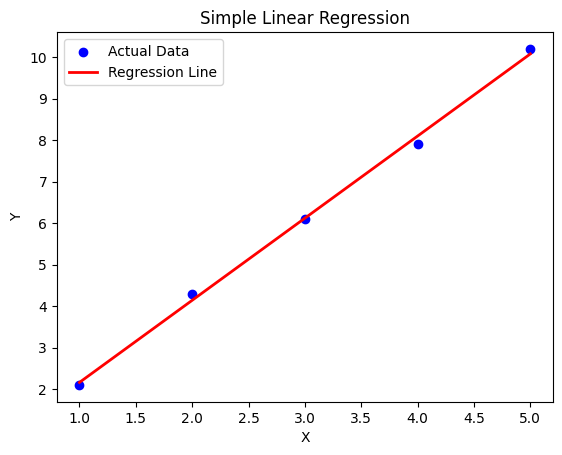

In [1]:
# QUESTION 6
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Reshape for sklearn
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Print coefficients
print("Intercept (β0):", model.intercept_)
print("Slope (β1):", model.coef_[0])

# Plot data points and regression line
plt.scatter(X, Y, color="blue", label="Actual Data")
plt.plot(X, Y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


In [2]:
# QUESTION 7
# Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Sample data
data = {
    "Area": [1200, 1500, 1800, 2000],
    "Rooms": [2, 3, 3, 4],
    "Price": [250000, 300000, 320000, 370000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Independent variables (X) and dependent variable (y)
X = df[["Area", "Rooms"]]
y = df["Price"]

# Fit Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Print coefficients
print("Intercept (β0):", model.intercept_)
print("Coefficients (β1 for Area, β2 for Rooms):", model.coef_)

# Predict values
y_pred = model.predict(X)

# Add constant for VIF calculation
X_with_const = sm.add_constant(X)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i)
                   for i in range(X_with_const.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Intercept (β0): 103157.89473684214
Coefficients (β1 for Area, β2 for Rooms): [   63.15789474 34736.84210526]

Variance Inflation Factor (VIF):
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


Intercept (β0): 0.06000000000000938
Coefficients (β1, β2): [0.   1.94 0.2 ]


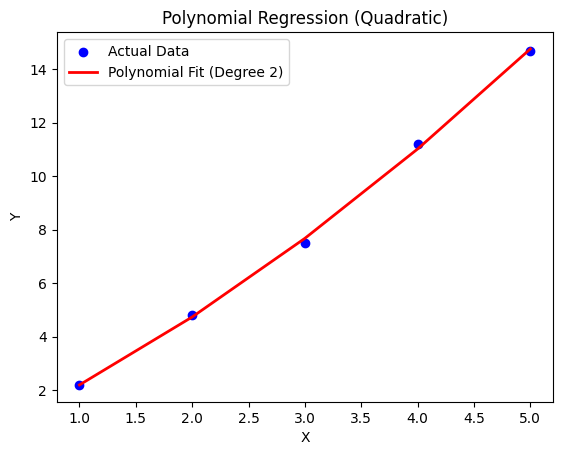

In [3]:
# QUESTION 8
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transform features for polynomial regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Predict values
Y_pred = model.predict(X_poly)

# Print coefficients
print("Intercept (β0):", model.intercept_)
print("Coefficients (β1, β2):", model.coef_)

# Plot original data and polynomial curve
plt.scatter(X, Y, color="blue", label="Actual Data")
plt.plot(X, Y_pred, color="red", linewidth=2, label="Polynomial Fit (Degree 2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression (Quadratic)")
plt.legend()
plt.show()


Intercept (β0): 6.499999999999993
Slope (β1): 1.1500000000000001
Residuals: [-3.   5.5 -1.  -2.5  1. ]


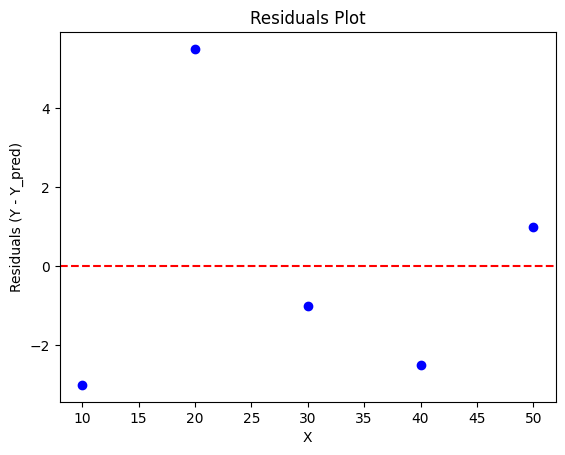

In [4]:
# QUESTION 9
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit regression model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Print regression details
print("Intercept (β0):", model.intercept_)
print("Slope (β1):", model.coef_[0])
print("Residuals:", residuals)

# Plot residuals
plt.scatter(X, residuals, color="blue")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("X")
plt.ylabel("Residuals (Y - Y_pred)")
plt.title("Residuals Plot")
plt.show()


# QUESTION 10
As a data scientist building a regression model for house price prediction:

✅ To address Heteroscedasticity (unequal variance of errors):

Transform variables – Apply log, square root, or Box-Cox transformation on house prices or predictors (e.g., log(price)) to stabilize variance.

Weighted Least Squares (WLS) – Give less weight to observations with higher variance.

Robust Regression – Use heteroscedasticity-robust standard errors (e.g., Huber or White’s correction).

✅ To address Multicollinearity (high correlation between predictors like area & rooms):

Check VIF (Variance Inflation Factor) – Identify highly correlated predictors (VIF > 10 indicates severe multicollinearity).

Remove or combine features – Drop redundant variables or combine correlated ones (e.g., area per room).

Dimensionality reduction – Use PCA (Principal Component Analysis) to create uncorrelated components.

Regularization methods – Apply Ridge or Lasso regression to penalize large coefficients and reduce multicollinearity impact.

✅ Ensuring a Robust Model:

After fixing these issues, re-train the model.

Validate using cross-validation to check performance stability.

Evaluate with metrics like R², RMSE, and MAE to confirm improvements.